In [1]:
import matplotlib.pyplot as plt
from rlgym_tools.rocket_league.replays.parsed_replay import ParsedReplay
import rocketxg as rxg
import rocketxg.plotting as rplot

In [2]:
replay = ParsedReplay.load("bds-g2.replay")

In [3]:
hits = rxg.generate_hits_table(replay)

In [4]:
players = list(hits.keys())

In [5]:
def get_ball_at_hit(hit):
    ball_df = replay.ball_df
    return ball_df.iloc[hit.frame, :]

In [6]:
from statistics import mode

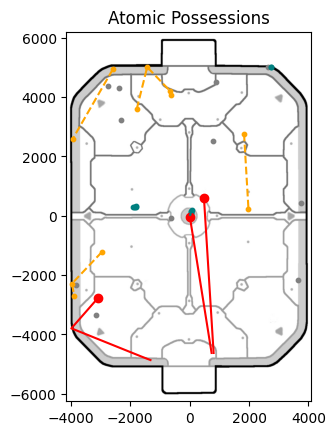

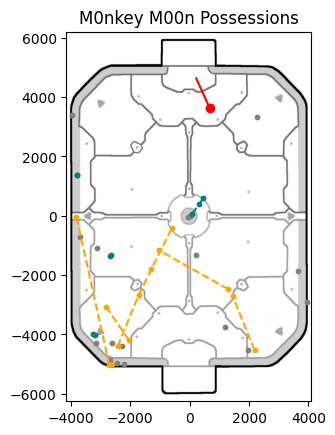

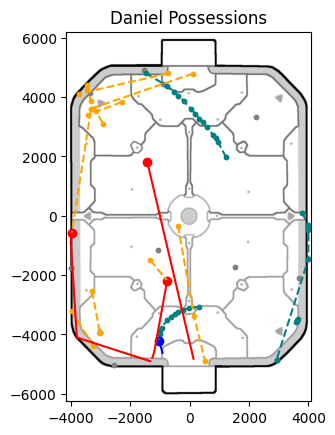

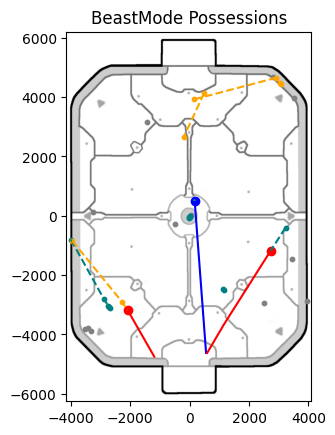

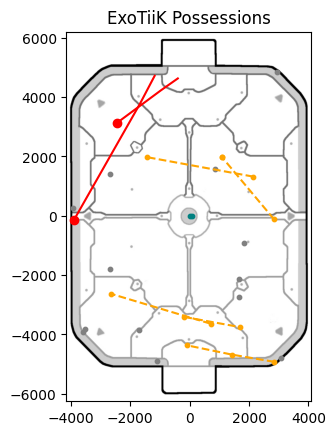

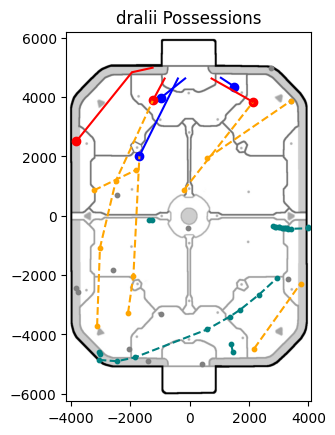

In [7]:

for player in players:
    player.generate_possessions()
    player.generate_shots(replay, time_s=3)
    fig, ax = rplot.plot_field()
    
    ball_x = []
    ball_y = []
    for hit in player.isolated_hits:
        ball_df = get_ball_at_hit(hit)
        ball_x.append(ball_df["pos_x"])
        ball_y.append(ball_df["pos_y"])
    ax.scatter(ball_x, ball_y, s=10, color="gray")
    

    for dribble in player.dribbles:
        ball_x = []
        ball_y = []
        for hit in dribble:
            ball_df = get_ball_at_hit(hit)
            ball_x.append(ball_df["pos_x"])
            ball_y.append(ball_df["pos_y"])
        ax.plot(ball_x, ball_y, color="teal", linestyle="dashed")
        ax.scatter(ball_x, ball_y, s=10, color="teal")
    
    for followup in player.followups:
        ball_x = []
        ball_y = []
        for hit in followup:
            ball_df = get_ball_at_hit(hit)
            ball_x.append(ball_df["pos_x"])
            ball_y.append(ball_df["pos_y"])
        ax.plot(ball_x, ball_y, color="orange", linestyle="dashed")
        ax.scatter(ball_x, ball_y, s=10, color="orange")
        
    if player.shots:
        for hit, hit_data in player.shots.items():
            color = "blue" if hit.is_goal else "red"
            ball = hit_data["ball_state"]
            sim = hit_data["sim_data"]
            ax.plot(sim["pos_x"], sim["pos_y"], color=color)
            ax.scatter(ball["pos_x"], ball["pos_y"], color=color)
    
    ax.set_title(f"{player.name} Possessions")
    plt.show()

In [ ]:
from rocketxg.hit_analysis import get_opponent_analysis, get_shooter_analysis

In [9]:
list(players[0].shots.keys())[0]

In [10]:
op_data = get_opponent_analysis(list(players[0].shots.keys())[0], players, replay)

In [ ]:
shooter_data = get_shooter_analysis(list(players[0].shots.keys())[0], players, replay)

In [11]:
op_data

op_0_pos_x            312.709991
op_0_pos_y            126.930000
op_0_pos_z            100.400002
op_0_vel_x            390.459991
op_0_vel_y            425.320007
op_0_vel_z            -26.270000
op_0_boost_amount      14.117647
op_1_pos_x           2691.189941
op_1_pos_y          -4642.729980
op_1_pos_z             17.010000
op_1_vel_x          -1175.900024
op_1_vel_y             57.459999
op_1_vel_z              0.070000
op_1_boost_amount      94.117645
op_2_pos_x            353.329987
op_2_pos_y           -352.329987
op_2_pos_z             17.010000
op_2_vel_x           1052.650024
op_2_vel_y           1748.420044
op_2_vel_z              0.000000
op_2_boost_amount       9.570648
dtype: float64

In [ ]:
shooter_data